# The probability distributions of hyperparameter choice recognized by hyperopt's optimization algorithms


This tutorial describes very briefly a few of the distributions that can be adopted to define domains of hyperparameter choice.


In [2]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.base import scope
from functools import partial
import numpy as np
import random
import matplotlib.pyplot as plt
import math

## hp.uniform(label, low, high) and hp.quniform(label, low, high,q)

##### hp.uniform(label, low, high)

* Returns a value uniformly between low and high.
* When optimizing, this variable is constrained to a two-sided interval
* Gives real numbers. 
* ##### So you will need to round it up if the hyperparameter can be integers only.



##### hp.quniform(label, low, high, q)

* Returns a value like round(uniform(low, high) / q) * q
* ##### Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below
* Number of discrete values is determined by q.



#### The following code generates visual diagrams to explain `hp.quniform(label, low, high, q)` for different value of q. You don't need to worry about the code.

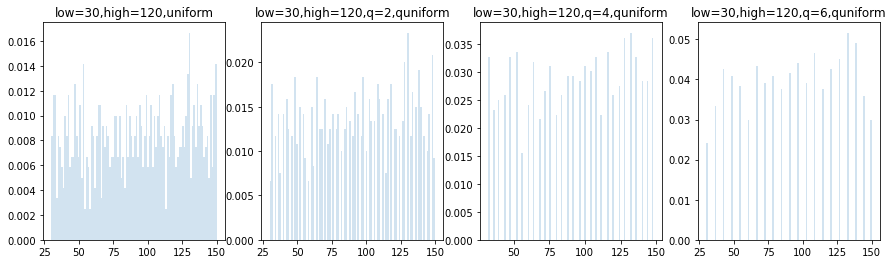

In [99]:
fig, ax = plt.subplots(1, 4,figsize=(15, 4))


low=30
high=120
from scipy.stats import uniform
rv = uniform.rvs(low, high,size=1000)
ax[0].hist(rv, density=True, histtype='stepfilled', alpha=0.2,bins=100)
ax[0].set_title('low=30,high=120,uniform')

q=2
rv1=np.round(rv/q)*q
ax[1].hist(rv1, density=True, histtype='stepfilled', alpha=0.2,bins=100)
ax[1].set_title('low=30,high=120,q=2,quniform')

q=4
rv2=np.round(rv/q)*q
ax[2].hist(rv2, density=True, histtype='stepfilled', alpha=0.2,bins=100)
ax[2].set_title('low=30,high=120,q=4,quniform')


q=6
rv3=np.round(rv/q)*q
ax[3].hist(rv3, density=True, histtype='stepfilled', alpha=0.2,bins=100)
ax[3].set_title('low=30,high=120,q=6,quniform')


plt.show()

## hp.loguniform(label, low, high) and  hp.qloguniform(label, low, high,q)

##### hp.loguniform(label, low, high)

* This will allow choices of a hyperparameter between `exp(low)` and `exp(high)`
* Allows a big domain of the hyperparameter to choose from but Numbers are drawn from distribution that looks like below shown in the figure.
* Gives real numbers. 
* ##### So you will need to round it up if the hyperparameter can be integers only.



##### hp.qloguniform(label, low, high,q)

* This will allow choices of a hyperparameter between `exp(low)` and `exp(high)`
* #### Gives integer numbers. The possible options are defined by `q`. As `q` increase the number of options decreases. 
* Suitable for hyperparameters which allows only integers. 
* Allows a big domain of the hyperparameter to choose from but Numbers are drawn from distribution that looks like below




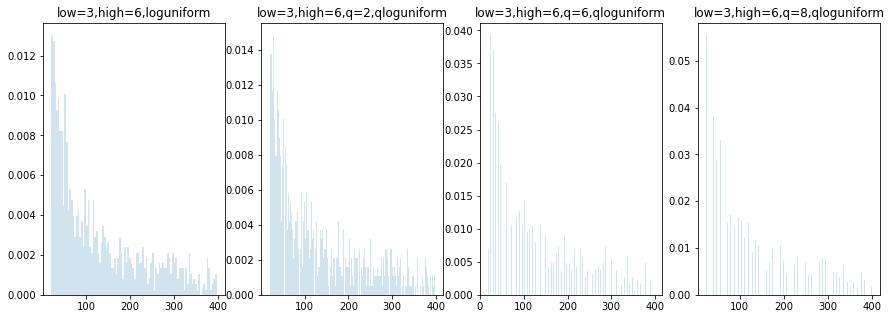

In [110]:
fig, ax = plt.subplots(1, 4,figsize=(15, 5))

low=3
high=6
from scipy.stats import loguniform
rv = loguniform.rvs(math.exp(low), math.exp(high),size=1000)
ax[0].hist(rv, density=True, histtype='stepfilled', alpha=0.2,bins=100)
ax[0].set_title("low=3,high=6,loguniform")


q = 2
rv1 = np.round(rv/q)*q
ax[1].hist(rv1, density=True, histtype='stepfilled', alpha=0.2,bins=200)
ax[1].set_title("low=3,high=6,q=2,qloguniform")

q = 6
rv2 = np.round(rv/q)*q
ax[2].hist(rv2, density=True, histtype='stepfilled', alpha=0.2,bins=200)
ax[2].set_title("low=3,high=6,q=6,qloguniform")


q = 8
rv3 = np.round(rv/q)*q
ax[3].hist(rv3, density=True, histtype='stepfilled', alpha=0.2,bins=200)
ax[3].set_title("low=3,high=6,q=8,qloguniform")

plt.show()

### Learning rate 

Usually learning are very small numbers. 

Here, we describe a few different ways to define search space for learning rate.

Using `loguniform`. Example shown below.

In [127]:
learning_rate = {'learning_rate': hp.loguniform('learning_rate',
                                                 np.log(0.005),
                                                 np.log(0.2))}

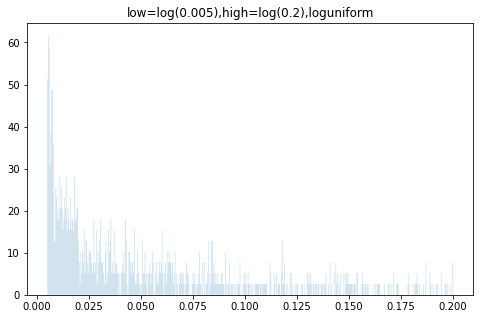

In [128]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))

low=np.log(0.005)
high=np.log(0.2)
from scipy.stats import loguniform
rv = loguniform.rvs(math.exp(low), math.exp(high),size=1000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2,bins=500)
ax.set_title("low=log(0.005),high=log(0.2),loguniform")
plt.show()

Using `normal distribution`. Example shown below.

Returns a real value that's normally-distributed with mean mu and standard deviation sigma. When optimizing, this is an unconstrained variable.

In [137]:
learning_rate = {'learning_rate': hp.normal('learning_rate',
                                                 0.001,
                                                 0.0001)}
                                    

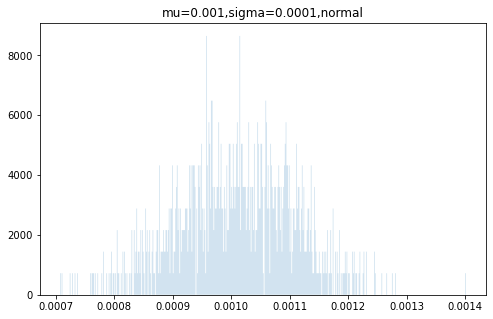

In [130]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))

mu=0.001
sigma=0.0001
from scipy.stats import norm
rv = norm.rvs(mu, sigma,size=1000)
ax.hist(rv, density=True, histtype='stepfilled', alpha=0.2,bins=500)
ax.set_title("mu=0.001,sigma=0.0001,normal")
plt.show()

## Other forms

##### hp.qnormal(label, mu, sigma, q)

* Returns a value like round(normal(mu, sigma) / q) * q
* Suitable for a discrete variable that probably takes a value around mu, but is fundamentally unbounded.

##### hp.lognormal(label, mu, sigma)

* Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed. * When optimizing, this variable is constrained to be positive

##### hp.qlognormal(label, mu, sigma, q)

* Returns a value like round(exp(normal(mu, sigma)) / q) * q
* Suitable for a discrete variable with respect to which the objective is smooth and gets smoother with the size of the variable, which is bounded from one side.